In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from dateutil import relativedelta
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['relativedelta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
col_names = ['customer_id','amount','date']
original_df = pd.read_csv('purchases.txt',delimiter='\t',names=col_names)
original_df.date = pd.to_datetime(original_df['date']) ## datetime
original_df['month'] = pd.DatetimeIndex(original_df['date']).month ## add in month
original_df['year'] = pd.DatetimeIndex(original_df['date']).year ## add in year
original_df.date = pd.DatetimeIndex(original_df['date'])
##days
start_date = datetime.datetime(2016,1,1)
original_df['days_since_purchase'] = start_date -original_df.date  ## days since last purchase for each purchase


In [4]:
#http://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [8]:
#Months
original_df['months_since_purchase']=original_df.date.apply(lambda x: diff_month(start_date,x))
#Year
original_df['years_since_purchase']=original_df.date.apply(lambda x: diff_year(start_date,x))


In [63]:
## Get quarters (three months = 1 quarter)
original_df['quarters_since_purchase'] = round(original_df.months_since_purchase/3)

In [307]:
original_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,qarters_since_purchase,quarters_since_purchase,state_one,state_two,state_three
0,760,25.0,2009-11-06,11,2009,2247 days,74,7,25.0,25.0,False,False,True
1,860,50.0,2012-09-28,9,2012,1190 days,40,4,13.0,13.0,False,True,False
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,41.0,41.0,False,False,False
3,1420,50.0,2009-07-09,7,2009,2367 days,78,7,26.0,26.0,False,False,True
4,1940,70.0,2013-01-25,1,2013,1071 days,36,3,12.0,12.0,True,False,False


In [137]:
original_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,qarters_since_purchase,quarters_since_purchase,state_one
0,760,25.0,2009-11-06,11,2009,2247 days,74,7,25.0,25.0,False
1,860,50.0,2012-09-28,9,2012,1190 days,40,4,13.0,13.0,False
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,41.0,41.0,False
3,1420,50.0,2009-07-09,7,2009,2367 days,78,7,26.0,26.0,False
4,1940,70.0,2013-01-25,1,2013,1071 days,36,3,12.0,12.0,True


In [10]:
## On average people make 2.78 purchases
print('Average purchases', np.mean(original_df.groupby(by=['customer_id']).count()['amount']))
# Median purcahses are 2.0
print('Median purchases',np.median(original_df.groupby(by=['customer_id']).count()['amount']))


Average purchases 2.7823749796383774
Median purchases 2.0


In [302]:
original_df[original_df.customer_id==80]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,qarters_since_purchase,quarters_since_purchase,state_one,state_two,state_three
11457,80,80.0,2011-08-05,8,2011,1610 days,53,5,18.0,18.0,False,True,False
11657,80,80.0,2013-08-07,8,2013,877 days,29,3,10.0,10.0,True,False,False
15624,80,60.0,2007-04-18,4,2007,3180 days,105,9,35.0,35.0,False,False,True
16131,80,80.0,2015-01-23,1,2015,343 days,12,1,4.0,4.0,True,False,False
40141,80,50.0,2005-09-24,9,2005,3751 days,124,11,41.0,41.0,False,False,False
45074,80,80.0,2014-03-05,3,2014,667 days,22,2,7.0,7.0,True,False,False
46422,80,70.0,2009-04-10,4,2009,2457 days,81,7,27.0,27.0,False,False,True


In [443]:
# number of days between purchases
first_last_per_customer =original_df.groupby('customer_id').date.max()  - original_df.groupby('customer_id').date.min()

In [444]:
first_last_per_customer= first_last_per_customer.reset_index()

In [445]:
number_of_purchases_per_cust = original_df.groupby('customer_id').amount.count()
number_of_purchases_per_cust = number_of_purchases_per_cust.reset_index()

In [446]:
number_of_purchases_per_cust.head()

,customer_id,amount
0,10,1
1,80,7
2,90,10
3,120,1
4,130,2


In [447]:
first_last_per_customer.head()

,customer_id,date
0,10,0 days
1,80,3408 days
2,90,3025 days
3,120,0 days
4,130,740 days


In [453]:
first_last_per_customer['average']= first_last_per_customer.date / number_of_purchases_per_cust.amount

In [450]:
average_time_between_purchases_days.head()

0      0
1    486
2    302
3      0
4    370
dtype: int64

In [461]:
average_time_between_purchases_days = first_last_per_customer

In [464]:
average_time_between_purchases_days['average_days'] =\
        (first_last_per_customer.date / number_of_purchases_per_cust.amount).apply(lambda x:x.days)
#average_time_between_purchases_days= average_time_between_purchases_days.apply(lambda x:x.days)
average_time_between_purchases_days['average_months']= average_time_between_purchases_days.average_days.apply(lambda x:x/30)

In [465]:
average_time_between_purchases_days.head()

,customer_id,date,average,average_days,average_months
0,10,0 days,0 days 00:00:00,0,0.000000
1,80,3408 days,486 days 20:34:17.142857,486,16.200000
2,90,3025 days,302 days 12:00:00,302,10.066667
3,120,0 days,0 days 00:00:00,0,0.000000
4,130,740 days,370 days 00:00:00,370,12.333333


In [12]:
## Average number of months since purchase per customer id
avg_months_since_purchase_per_customer= original_df.groupby(by=['customer_id',])['months_since_purchase'].mean().reset_index()

In [437]:
#(### average number of days between purcahses per customer id
## 0days means only one purchase

print('Average days in-between purchases',np.mean( \
average_time_between_purchases_days))

print('Median number of days in-between purchases',np.median( \
                        average_time_between_purchases_days))

Average days in-between purchases 171.68892870717272
Median number of days in-between purchases 51.0


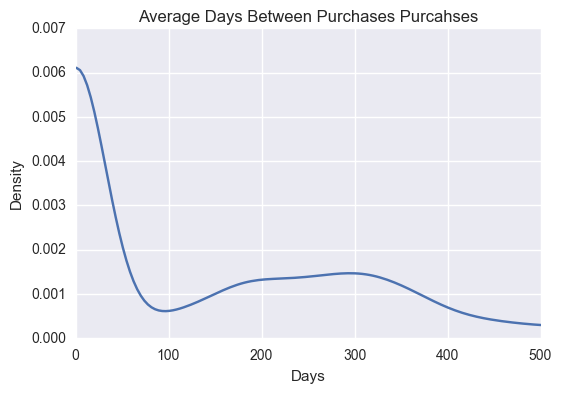

In [466]:
average_time_between_purchases_days.average_days.plot(kind='kde',xlim=[0,500])
plt.title('Average Days Between Purchases Purcahses')
plt.xlabel('Days')

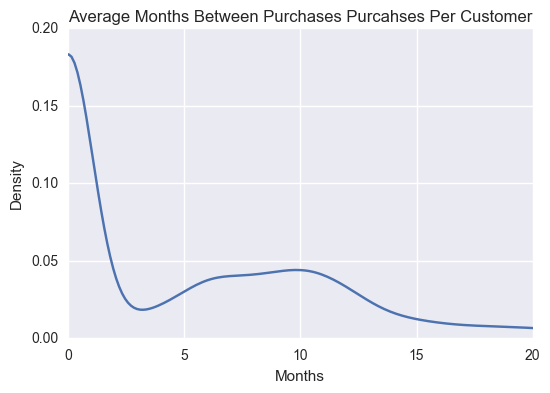

In [470]:


average_time_between_purchases_days.average_months.plot(kind='kde',xlim=[0,20])
plt.title('Average Months Between Purchases Purcahses Per Customer')
plt.xlabel('Months')

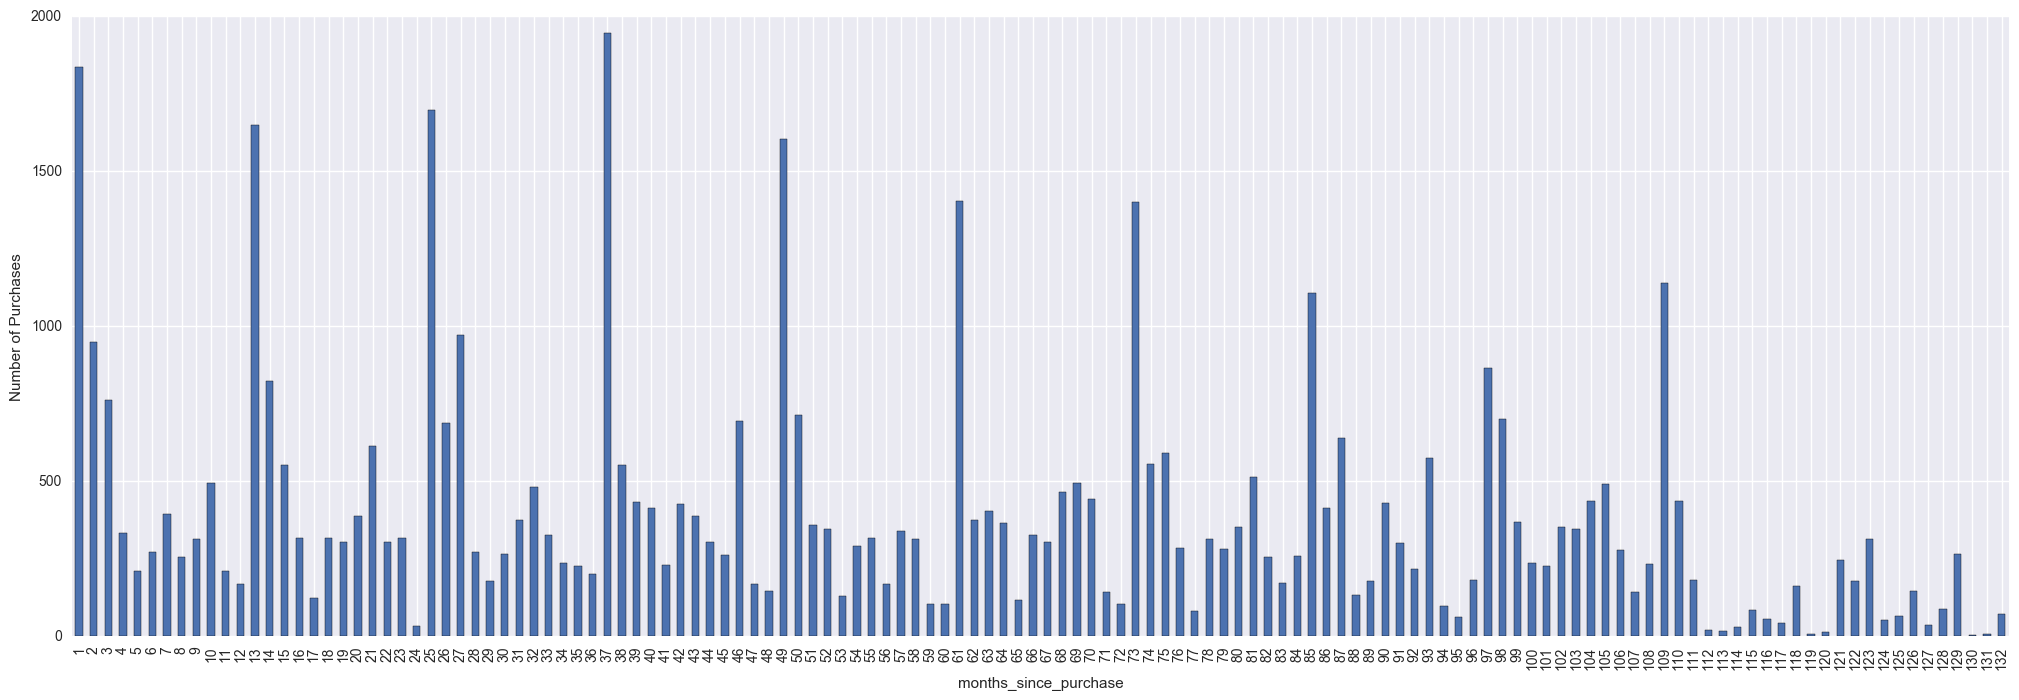

In [23]:
## Number of purchases per month total - not by unique customer id
original_df.groupby(by=['months_since_purchase']).count()['customer_id'].plot(kind='bar',figsize=([25,8]))
plt.ylabel('Number of Purchases')

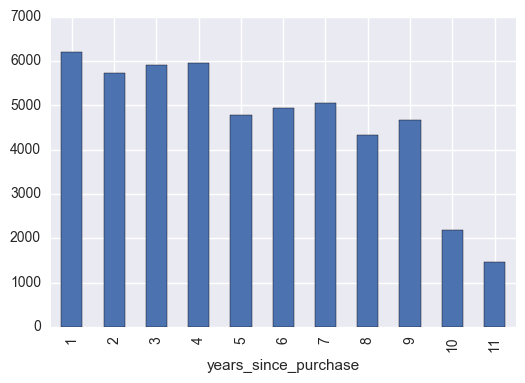

In [122]:
## Number of pruchases per year total - not by unique customer id
original_df.groupby(by=['years_since_purchase']).count()['customer_id'].plot(kind='bar')

In [110]:
cumulative_purchases_per_year = original_df.groupby(by=['years_since_purchase']).count()['customer_id'].apply(
lambda x: x/sum(original_df.groupby(by=['years_since_purchase']).count())).reset_index()

In [111]:
cumulative_purchases_per_year['running_total'] = cumulative_purchases_per_year.customer_id.cumsum()

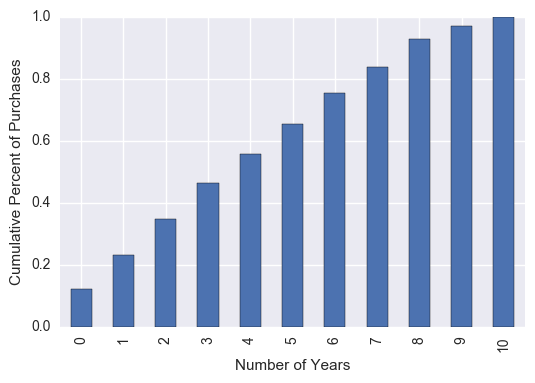

In [288]:
## Cumulative purchases over years

cumulative_purchases_per_year.running_total.plot(kind='bar')
plt.ylabel('Cumulative Percent of Purchases')
plt.xlabel('Number of Years Since Purchase')

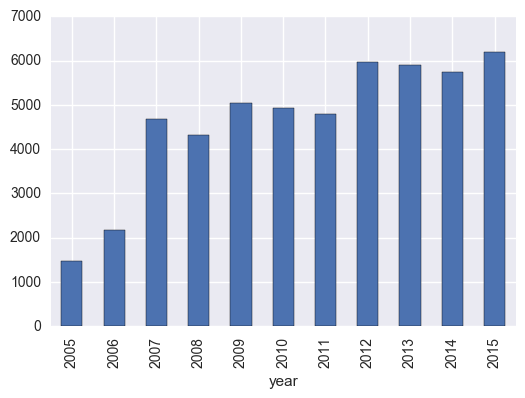

In [115]:
## Total number of purchases per year
original_df.groupby(['year']).count()['customer_id'].plot(kind='bar')

## Based on the above analysis, let us define a state as  180 days (slightly longer than the average of ~171 days) to account for the additional data.
- Therefore, we will have 18 states in our transition matrix up to year nine (cutting out years 10 and 11)
- State One : <= 180 days
- State Two : >180 days <= 360 days
- State Three : > 360 days <= 540 days
- State Four: > 540 days and <= 720 days
- State Five : > 720 days and <= 900 days
- State six: >900 and <= 1080 days
- State seven: > 1080 days and <= 1260 days
- State eight: > 1260 and <=1440
- State nine: > 1440 and <=1620
- State ten: > 1620 and <=1800
- State eleven: >1800 and <=1980
- State twelve: > 1980 and <=2160
- State thirteen: >2160 and <=2340
- State fourteen: > 2340 and <=2520
- State fiveteen: > 2520 and <= 2700
- State sixteen: > 2700 and <= 2880
- State seventeen: >2880 and <= 3060
- State eighteen: > 3060 and <= 3240

> Drop records that are 10 or 11 years since purchase

- Create indicators for our state

In [ ]:
## Create indicators for our state
original_df['state_one'] = original_df.years_since_purchase.apply(lambda x: 3-x) >=0
original_df['state_two'] =  original_df.years_since_purchase.apply(lambda x: x>3 and x<=6)
original_df['state_three'] =  original_df.years_since_purchase.apply(lambda x: x>6 and x<=9)





- State One : <= 180 days
- State Two : >180 days <= 360 days
- State Three : > 360 days <= 540 days
- State Four: > 540 days and <= 720 days
- State Five : > 720 days and <= 900 days
- State six: >900 and <= 1080 days
- State seven: > 1080 days and <= 1260 days
- State eight: > 1260 and <=1440
- State nine: > 1440 and <=1620
- State ten: > 1620 and <=1800
- State eleven: >1800 and <=1980
- State twelve: > 1980 and <=2160
- State thirteen: >2160 and <=2340
- State fourteen: > 2340 and <=2520
- State fiveteen: > 2520 and <= 2700
- State sixteen: > 2700 and <= 2880
- State seventeen: >2880 and <= 3060
- State eighteen: > 3060 and <= 3240

In [183]:
## drop these 
original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,qarters_since_purchase,quarters_since_purchase,state_one,state_two,state_three
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,41.0,41.0,False,False,False
6,2620,30.0,2006-03-09,3,2006,3585 days,118,10,39.0,39.0,False,False,False
8,3120,150.0,2006-11-08,11,2006,3341 days,110,10,37.0,37.0,False,False,False
12,4000,20.0,2005-11-25,11,2005,3689 days,122,11,41.0,41.0,False,False,False
16,4840,30.0,2005-10-14,10,2005,3731 days,123,11,41.0,41.0,False,False,False
17,4910,15.0,2006-12-13,12,2006,3306 days,109,10,36.0,36.0,False,False,False
19,4970,30.0,2006-12-01,12,2006,3318 days,109,10,36.0,36.0,False,False,False
20,5250,50.0,2005-12-20,12,2005,3664 days,121,11,40.0,40.0,False,False,False
22,5990,30.0,2006-03-17,3,2006,3577 days,118,10,39.0,39.0,False,False,False
23,6240,100.0,2006-11-09,11,2006,3340 days,110,10,37.0,37.0,False,False,False


In [184]:
indexes_to_drop = original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)].index

In [186]:
indexes_to_drop

Int64Index([    2,     6,     8,    12,    16,    17,    19,    20,    22,
               23,
            ...
            51088, 51089, 51098, 51109, 51143, 51151, 51164, 51175, 51176,
            51186],
           dtype='int64', length=3652)

In [191]:
state_df = original_df.drop(original_df.index[indexes_to_drop])

In [194]:
## Confirm we dropped everything correctly
state_df[(state_df.state_one == False) &
            (state_df.state_two == False) &
                (state_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,qarters_since_purchase,quarters_since_purchase,state_one,state_two,state_three


In [277]:
## get the most recent purchase per customer
customer_id_by_date = state_df.ix[state_df.groupby('customer_id').date.idxmax(),:]

In [279]:
customer_id_by_date.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,qarters_since_purchase,quarters_since_purchase,state_one,state_two,state_three
16131,80,80.0,2015-01-23,1,2015,343 days,12,1,4.0,4.0,True,False,False
16859,90,100.0,2013-12-04,12,2013,758 days,25,3,8.0,8.0,True,False,False
32193,120,20.0,2012-03-01,3,2012,1401 days,46,4,15.0,15.0,False,True,False
4073,130,60.0,2007-11-14,11,2007,2970 days,98,9,33.0,33.0,False,False,True
42643,160,30.0,2007-11-21,11,2007,2963 days,98,9,33.0,33.0,False,False,True


In [225]:
unique_customer_id = state_df.customer_id.unique()
unique_customer_id[0]

760

In [287]:
## Check number of customers wwhere state is in last state

number_in_state_one = 0
number_in_state_two = 0
number_in_state_three = 0
number_of_customers = len(unique_customer_id)

# get number in state one
for customer in unique_customer_id:
    if customer_id_by_date.state_one[(state_df['customer_id']==customer)].any() == True:
        number_in_state_one +=1
    else:
        pass
# get number in state two
for customer in unique_customer_id:
    if customer_id_by_date.state_two[(state_df['customer_id']==customer)].any() == True:
        number_in_state_two +=1
    else:
        pass
# get number of customer in state three

for customer in unique_customer_id:
    if customer_id_by_date.state_three[(state_df['customer_id']==customer)].any() == True:
        number_in_state_three +=1
    else:
        pass

In [289]:
## Next calculate percent
percent_state_one = number_in_state_one / number_of_customers 
percent_state_two = number_in_state_two / number_of_customers 
percent_state_three = number_in_state_three / number_of_customers 



In [290]:
percent_state_one

0.5225464190981433

In [291]:
percent_state_two

0.2640103843332017

In [293]:
percent_state_three

0.21344319656865512